<a href="https://colab.research.google.com/github/NBS92/Banco_de_Dados_II/blob/main/Natalia_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFORMAÇÕES SOBRE A BASE DE DADOS UTILIZADA

- **Dataset utilizada para este trabalho:** Cats Dataset
- **Site:** [Visualizar a base de dados](https://www.kaggle.com/datasets/waqi786/cats-dataset)
- **Sobre este arquivo:** *Este arquivo contém o abrangente "Cats Dataset", que inclui registros detalhados de 1000 gatos individuais. O conjunto de dados fornece informações valiosas sobre a raça, idade, peso, cor e sexo de cada gato. Ele é estruturado em um formato tabular, facilitando a análise e a interpretação.*

1. **Formato:** CSV (Comma-Separated Values);
2. **Número de registros:** 1000 linhas, cada uma representando um gato único;
3. **Colunas:** 5 colunas, detalhando vários atributos dos gatos:
- **Raça:** A raça do gato;
- **Idade (anos):** A idade do gato em anos;
- **Peso (kg):** O peso do gato em quilogramas;
- **Cor:** A cor do pêlo do gato;
- **Gênero:** O gênero do gato (masculino ou feminino)

# TRABALHO N2 - BANCO DE DADOS II

- **Identificação:** Natalia Brito da Silva
- **Este campo contém:**
1.   Importação das bibliotecas;
2.   Visualização do arquivo de diferentes formas;
3.   Renomeação das colunas para PT-BR.



In [412]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [413]:
df_cats = pd.read_csv('/content/drive/MyDrive/IFAC/Sistemas para Internet/3º Período/Banco de Dados II/Kaggle/cats_dataset.csv') # Lê o arquivo

In [414]:
df_cats.head() # Mostra as 5 primeiras linhas da tabela

,Breed,Age (Years),Weight (kg),Color,Gender
0,Russian Blue,19,7,Tortoiseshell,Female
1,Norwegian Forest,19,9,Tortoiseshell,Female
2,Chartreux,3,3,Brown,Female
3,Persian,13,6,Sable,Female
4,Ragdoll,10,8,Tabby,Male


In [415]:
pd.set_option('display.max_columns', None) # Exibe todas as colunas
pd.set_option('display.max_rows', None) # Exibe todas as linhas
# df_cats # Mostra o arquivo (Deixei comentado devido a quantidade de linhas da tabela)

In [416]:
df_cats.rename(columns={
    'Breed': 'Raça',
    'Age (Years)': 'Idade (anos)',
    'Weight (kg)': 'Peso (kg)',
    'Color': 'Cor',
    'Gender': 'Gênero'
}, inplace=True) # Renomeia as colunas

df_cats.head() # Mostra as 5 primeiras linhas

,Raça,Idade (anos),Peso (kg),Cor,Gênero
0,Russian Blue,19,7,Tortoiseshell,Female
1,Norwegian Forest,19,9,Tortoiseshell,Female
2,Chartreux,3,3,Brown,Female
3,Persian,13,6,Sable,Female
4,Ragdoll,10,8,Tabby,Male


# GRÁFICOS

---

📊 **GRÁFICO 1 - GATOS FILHOTES E ADULTOS**

Esta análise pode ser útil para entender a composição etária da amostra de gatos e pode ajudar em estudos relacionados à saúde, cuidados e necessidades específicas de cada faixa etária.


---

In [417]:
# Verificar se há mais gatinhos filhotes ou gatos adultos de acordo com o parâmetro estabelecido

# Contar a quantidade de gatos que possuem idades abaixo de 2 anos e os que possuem idade maior ou igual a 2 anos:
gatos_filhotes = df_cats[df_cats['Idade (anos)'] < 2].shape[0]
gatos_adultos = df_cats[df_cats['Idade (anos)'] >= 2].shape[0]

# Resultados:
print(f"Quantidade de gatos filhotes: {gatos_filhotes}")
print(f"Quantidade de gatos adultos: {gatos_adultos}")

# Testando as condicionais:
if gatos_filhotes > gatos_adultos:
    print("Há mais gatos filhotes do que gatos adultos.")
elif gatos_adultos > gatos_filhotes:
    print("Há mais gatos adultos do que filhotes.")
else:
    print("Há a mesma quantidade de gatos filhotes e gatos adultos.")

Quantidade de gatos filhotes: 48
Quantidade de gatos adultos: 952
Há mais gatos adultos do que filhotes.


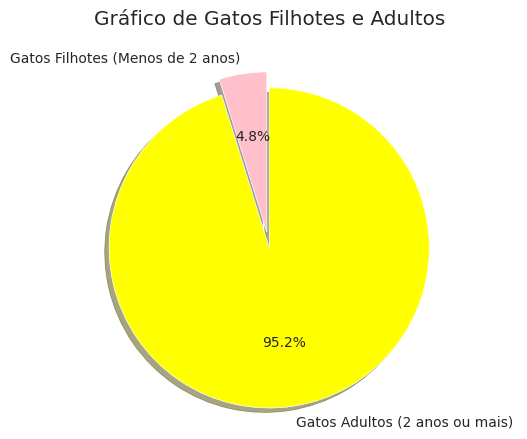

In [418]:
# Gráfico de Gatos Filhotes e Adultos

# Este gráfico exibe a distribuição dos gatos na base de dados, categorizados como filhotes ou adultos.

# Dados para o gráfico:
labels = ['Gatos Filhotes (Menos de 2 anos)', 'Gatos Adultos (2 anos ou mais)']
sizes = [gatos_filhotes, gatos_adultos]
colors = ['pink','yellow']
explode = (0.1, 0)  # Destaca a primeira fatia (Filhotes)

# Criando o gráfico de pizza:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Assegura que o gráfico seja um círculo
plt.title('Gráfico de Gatos Filhotes e Adultos\n')
plt.show()


---

📊 **GRÁFICO 2 - MÉDIA DE IDADE POR RAÇA**

Esta análise pode ser útil para identificar tendências relacionadas à longevidade ou à faixa etária predominante entre diferentes raças de gatos, proporcionando insights sobre a expectativa de vida média e possíveis variações relacionadas à raça.

---

In [419]:
# Calcular a média e a mediana dos felinos levando em consideração a idade por raça.

# Agrupando os dados por raça e calculando a média e a mediana da idade:
raca_estatisticas = df_cats.groupby('Raça')['Idade (anos)'].agg(['mean', 'median'])

# Renomeando as colunas para PT-BR:
raca_estatisticas.rename(columns={
    'mean': 'Média',
    'median': 'Mediana',
}, inplace=True)

# Mostrar o resultado:
print(raca_estatisticas)

                        Média  Mediana
Raça                                  
Abyssinian          10.212121     10.0
American Shorthair  10.300000     10.5
Balinese             9.971429     11.0
Bengal              11.371429     12.0
Birman              10.121212     11.0
British Shorthair    9.666667      9.0
Burmese              9.638889      9.5
Chartreux            9.969697     10.0
Cornish Rex         10.344828     11.0
Devon Rex            9.714286      9.0
Egyptian Mau        10.333333     10.0
Exotic Shorthair    11.064516     12.0
Himalayan           11.666667     13.0
Maine Coon          10.424242      8.0
Manx                 9.181818      7.0
Munchkin             8.875000      8.0
Norwegian Forest     9.640000     10.0
Ocicat              11.242424     11.0
Oriental            10.297297     11.0
Persian             10.837838     12.0
Ragdoll              9.294118      8.0
Russian Blue         9.464286      9.0
Savannah            11.129032     12.0
Scottish Fold       11.19

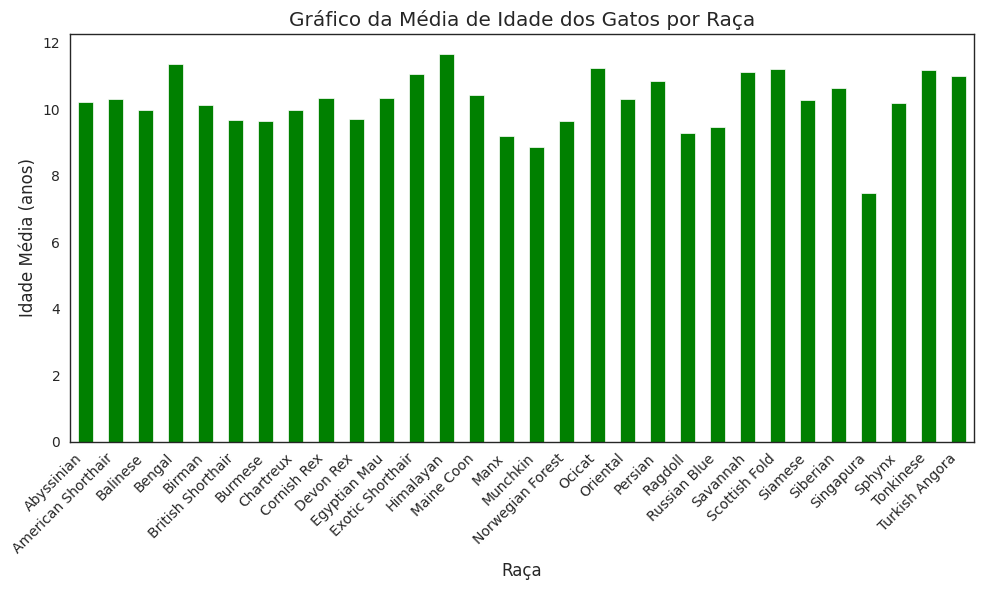

In [420]:
# Gráfico de barras que mostra a média de idade por raça:

# Este gráfico de barras apresenta a média de idade dos felinos agrupados por raça.
# Cada barra mostra a idade média dos felinos para uma raça específica, permitindo a comparação direta entre as raças.

plt.figure(figsize=(10, 6))
raca_estatisticas['Média'].plot(kind='bar', color='green')
plt.title('Gráfico da Média de Idade dos Gatos por Raça')
plt.xlabel('Raça')
plt.ylabel('Idade Média (anos)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---

📊 **GRÁFICO 3 - RAÇAS MAIS COMUNS**

Esta análise pode ser útil para entender a diversidade de raças na base de dados e pode auxiliar na análise de padrões de ocorrência e popularidade entre os felinos registrados.

---

In [421]:
# Identificar quais raças são mais comuns na base de dados.

contagem_racas = df_cats['Raça'].value_counts()  # Contar a ocorrência de cada raça
racas_mais_comuns = contagem_racas.head(100)  # Pegar as 100 raças mais comuns
print(racas_mais_comuns)  # Mostrar as raças mais comuns


Raça
Ragdoll               51
American Shorthair    40
Egyptian Mau          39
Persian               37
Oriental              37
British Shorthair     36
Burmese               36
Balinese              35
Bengal                35
Siberian              34
Birman                33
Manx                  33
Maine Coon            33
Abyssinian            33
Ocicat                33
Chartreux             33
Singapura             32
Munchkin              32
Sphynx                32
Siamese               32
Exotic Shorthair      31
Turkish Angora        31
Savannah              31
Scottish Fold         31
Tonkinese             30
Himalayan             30
Cornish Rex           29
Devon Rex             28
Russian Blue          28
Norwegian Forest      25
Name: count, dtype: int64


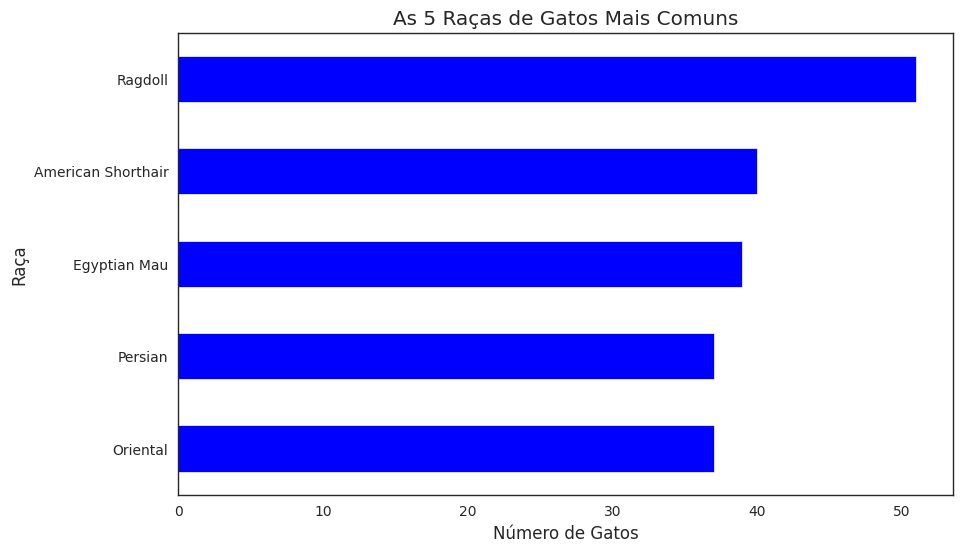

In [422]:
# Gráfico que mostra quais raças são mais comuns na base de dados.

# Este gráfico apresenta a frequência das raças de felinos registradas na base de dados.
# Cada barra representa o número de felinos de uma raça específica, permitindo identificar quais raças são mais comuns na amostra analisada.

# Contagem de gatos por raça:
contagem_racas = df_cats['Raça'].value_counts()

# Gráfico de barras horizontais para as 5 raças mais comuns:
plt.figure(figsize=(10, 6))
contagem_racas.head(5).plot(kind='barh', color='blue')
plt.title('As 5 Raças de Gatos Mais Comuns')
plt.xlabel('Número de Gatos')
plt.ylabel('Raça')
plt.gca().invert_yaxis()  # Inverter o eixo y para mostrar a raça mais comum no topo
plt.show()


---

📊 **GRÁFICO 4 - CORES EM COMUM DOS FELINOS**

Esta análise pode ser útil para identificar padrões de cor e entender as variações de pelagem entre os gatos estudados.

---

In [423]:
# Ver as cores em comum dos felinos na base de dados.

# Contar as cores:
color_counts = df_cats['Cor'].value_counts()

# Mostrar a quantidade de cores em comum:
most_common_colors = color_counts
print(most_common_colors)

Cor
Tricolor         73
Gray             73
Pointed          70
Bicolor          69
Sable            68
Cream            68
Black            67
Red              67
Tortoiseshell    66
Brown            64
Tabby            64
Calico           64
Orange           64
Blue             63
White            60
Name: count, dtype: int64


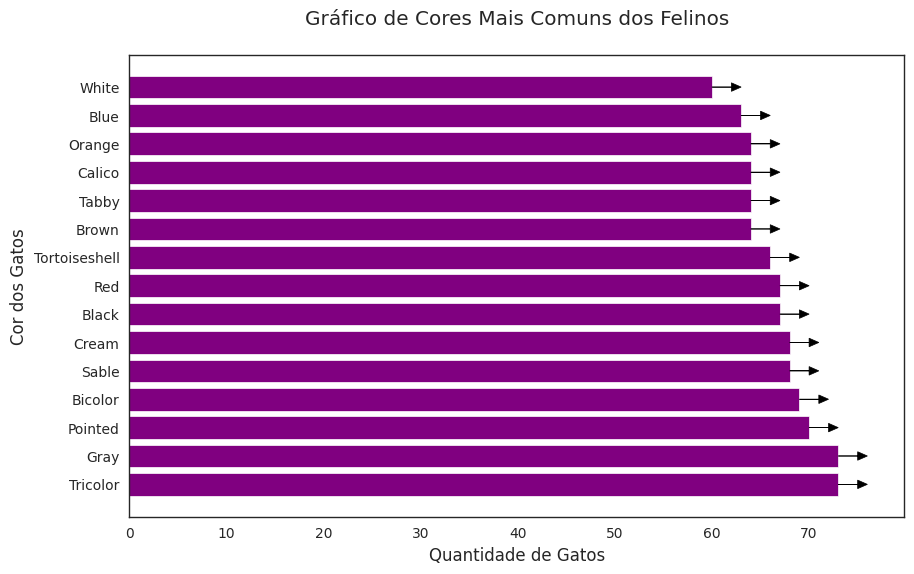

In [424]:
# Gráfico contendo as cores em comum dos felinos na base de dados.

# Este gráfico exibe a distribuição das cores mais comuns observadas entre os felinos na base de dados.
# Cada segmento ou barra representa a frequência de uma cor específica ou combinação de cores,
# fornecendo uma visão clara das características de coloração predominantes na amostra.

# Gráfico de barras horizontais com setas à direita para as cores mais comuns:
plt.figure(figsize=(10, 6))
plt.barh(color_counts.index, color_counts.values, color='purple')
plt.xlabel('Quantidade de Gatos')
plt.ylabel('Cor dos Gatos')
plt.title('Gráfico de Cores Mais Comuns dos Felinos\n')

# Adicionando setas à direita das barras:
for i, v in enumerate(color_counts.values):
    plt.arrow(v, i, 2, 0, head_width=0.3, head_length=1, fc='black', ec='black')

plt.show()


---

📊 **GRÁFICO 5 - CONTAGEM POR GÊNERO/SEXO DO FELINO**

Esta análise pode ser útil para entender a distribuição de gênero na população de felinos estudada.

---

In [425]:
# Contagem por Gênero/Sexo do Felino

# Contagem por gênero:
gender_counts = df_cats['Gênero'].value_counts()

# Resultado:
print(gender_counts)


Gênero
Male      505
Female    495
Name: count, dtype: int64


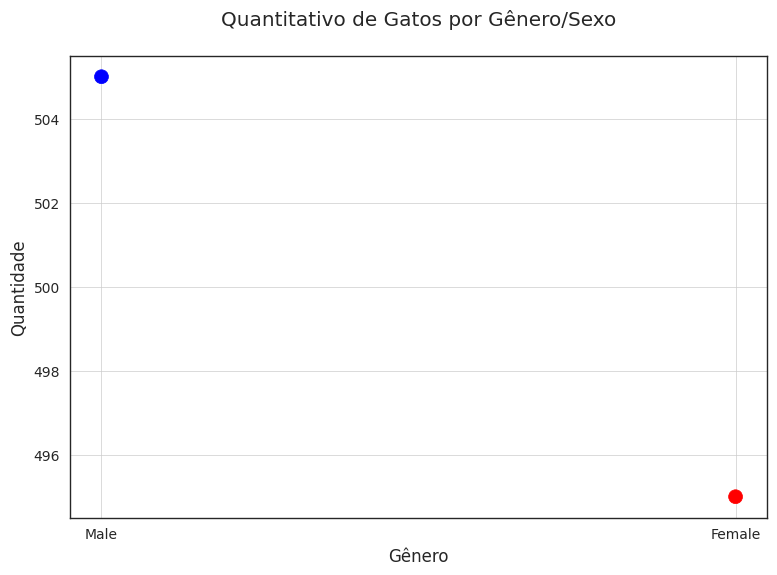

In [426]:
# Gráfico que mostra a contagem por Gênero/Sexo do Felino

# O gráfico representa o número total de machos e fêmeas, facilitando a análise da proporção entre os sexos dos gatos.

import matplotlib.pyplot as plt
# Dados para o gráfico de dispersão
generos = gender_counts.index.tolist()
contagens = gender_counts.values.tolist()

# Criando o gráfico de dispersão
plt.figure(figsize=(9, 6))
plt.scatter(generos, contagens, s=100, c=['blue', 'red'])  # Ajusta as cores
plt.title('Quantitativo de Gatos por Gênero/Sexo\n')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.grid(True)
plt.show()


---

📊 **GRÁFICO 6 - VARIAÇÃO DO PESO E DISTRIBUIÇÃO DOS PESOS DOS FELINOS**

Esta análise pode ser útil para identificar padrões e variações nos pesos, facilitando estudos sobre a saúde e nutrição felina.

---

In [427]:
# Analisar a variação de peso entre diferentes gatos.

# Calcular o peso:
mean_weight = df_cats['Peso (kg)'].mean()
median_weight = df_cats['Peso (kg)'].median()
std_dev_weight = df_cats['Peso (kg)'].std()
min_weight = df_cats['Peso (kg)'].min()
max_weight = df_cats['Peso (kg)'].max()

# Mostrar os resultados:
print("Estatísticas do peso dos gatos:")
print(f"Média: {mean_weight:.2f} kg")
print(f"Mediana: {median_weight} kg")
print(f"Desvio Padrão: {std_dev_weight:.2f} kg")
print(f"Peso Mínimo: {min_weight} kg")
print(f"Peso Máximo: {max_weight} kg")

Estatísticas do peso dos gatos:
Média: 5.55 kg
Mediana: 6.0 kg
Desvio Padrão: 2.23 kg
Peso Mínimo: 2 kg
Peso Máximo: 9 kg


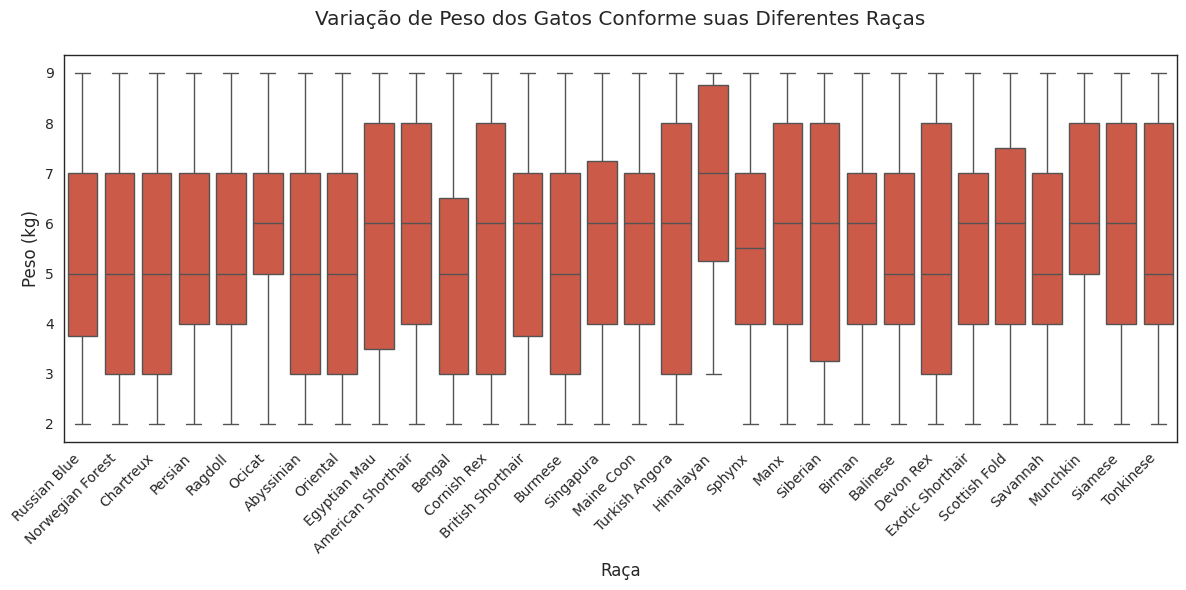

In [428]:
# Gráfico de variação do peso dos gatos conforme suas diferentes raças:

# Este gráfico mostra a variação do peso dos gatos conforme suas diferentes raças.
# A visualização ilustra as diferenças médias de peso entre as raças e ajuda a identificar quais raças tendem a ter pesos mais altos ou mais baixos.

plt.figure(figsize=(12, 6))
sns.boxplot(x='Raça', y='Peso (kg)', data=df_cats)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Raça')
plt.ylabel('Peso (kg)')
plt.title('Variação de Peso dos Gatos Conforme suas Diferentes Raças\n')
plt.tight_layout()
plt.show()

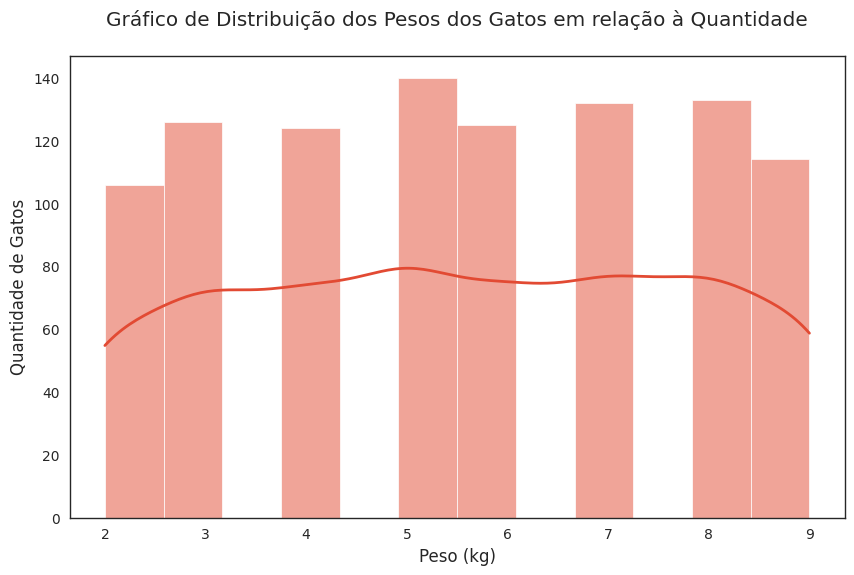

In [429]:
# Gráfico de Distribuição dos Pesos dos Gatos em relação à Quantidade:

# Este gráfico apresenta a distribuição dos pesos dos gatos em uma determinada amostra.
# Os dados são organizados em intervalos de peso, mostrando a quantidade de gatos que se enquadra em cada faixa.

plt.figure(figsize=(10, 6))
sns.histplot(df_cats['Peso (kg)'], kde=True)
plt.xlabel('Peso (kg)')
plt.ylabel('Quantidade de Gatos')
plt.title('Gráfico de Distribuição dos Pesos dos Gatos em relação à Quantidade\n')
plt.show()